In [428]:
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [429]:
sber = pd.read_csv('SBER_101001_171001.txt')
mvid = pd.read_csv('MVID_101001_171001.txt')

In [430]:
mvid.head()

,<TICKER>,<PER>,<DATE>,<TIME>,<CLOSE>,<VOL>
0,MVID,D,20101001,0,194.38,19406
1,MVID,D,20101004,0,190.00,31039
2,MVID,D,20101005,0,187.00,17651
3,MVID,D,20101006,0,190.04,36482
4,MVID,D,20101007,0,199.85,204248


In [431]:
sber.head()

,<TICKER>,<PER>,<DATE>,<TIME>,<CLOSE>,<VOL>
0,SBER,D,20101001,0,89.09,332429890
1,SBER,D,20101004,0,89.88,194032721
2,SBER,D,20101005,0,91.97,198775753
3,SBER,D,20101006,0,91.20,210406027
4,SBER,D,20101007,0,90.40,145137617


In [432]:
mvid.shape, sber.shape

((1758, 6), (1758, 6))

In [433]:
#агрегация данных
res  = pd.merge(sber,mvid, on='<DATE>') #merge simillar to join in sql 
res.head(6)

,<TICKER>_x,<PER>_x,<DATE>,<TIME>_x,<CLOSE>_x,<VOL>_x,<TICKER>_y,<PER>_y,<TIME>_y,<CLOSE>_y,<VOL>_y
0,SBER,D,20101001,0,89.09,332429890,MVID,D,0,194.38,19406
1,SBER,D,20101004,0,89.88,194032721,MVID,D,0,190.00,31039
2,SBER,D,20101005,0,91.97,198775753,MVID,D,0,187.00,17651
3,SBER,D,20101006,0,91.20,210406027,MVID,D,0,190.04,36482
4,SBER,D,20101007,0,90.40,145137617,MVID,D,0,199.85,204248
5,SBER,D,20101008,0,90.50,125230555,MVID,D,0,197.71,116703


In [434]:
res.describe()

,<DATE>,<TIME>_x,<CLOSE>_x,<VOL>_x,<TIME>_y,<CLOSE>_y,<VOL>_y
count,1.758000e+03,1758.0,1758.000000,1.758000e+03,1758.0,1758.000000,1.758000e+03
mean,2.013818e+07,0.0,103.127878,1.206129e+08,0.0,261.890666,1.183061e+05
std,2.043505e+04,0.0,30.083143,8.364783e+07,0.0,62.918185,2.965367e+05
min,2.010100e+07,0.0,53.500000,1.409153e+07,0.0,123.000000,3.300000e+02
25%,2.012070e+07,0.0,81.985000,6.452312e+07,0.0,215.485000,3.211000e+04
50%,2.014040e+07,0.0,96.025000,9.901520e+07,0.0,253.125000,6.053500e+04
75%,2.016010e+07,0.0,106.892500,1.505951e+08,0.0,280.657500,1.154075e+05
max,2.017100e+07,0.0,193.700000,6.190570e+08,0.0,432.400000,5.942750e+06


In [435]:
X = res['<CLOSE>_x']
Y = res['<CLOSE>_y']

#для нормализации узнаем мин и макс значения выборки Х
x_min = res['<CLOSE>_x'].min()
x_max = res['<CLOSE>_x'].max()

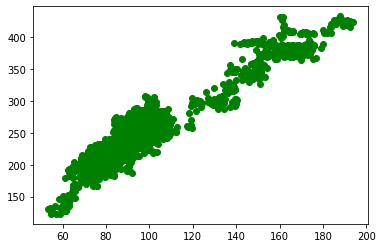

In [436]:
plt.figure()
plt.scatter(X,Y, color='green')
plt.show()


In [437]:
class Model:
    def __init__(self):
        self.b0 = 0
        self.b1 = 0
    def predict(self,x):
        
        #сделать нормализацию данных
        ''' x'=(x-xmin)/(xmax-xmin) '''
        x_norm = (x-x_min)/(x_max-x_min)
        
        return self.b0 + self.b1 * x_norm
    
    def error(self,x,y):
        return sum((self.predict(x) - y)** 2) / (2*len(x))
    
    def fit(self,x,y): #метод градиентного спуска
    
        
        #градиент функций
        alpha = 0.9
        x_norm = (x-x_min)/(x_max-x_min)
        errors = []
        steps = list(range(100))
        for _ in steps:
            dj0 = sum(self.predict(x) - y )/ len(x_norm)
            dj1 = sum((self.predict(x) - y)* x_norm) /len(x_norm)
            #приближаемся к оптимуму 
            self.b0 = self.b0 - alpha*dj0
            self.b1 = self.b1 - alpha*dj1
            
            #график ошибок
            errors.append(self.error(x,y))
            steps
        return steps,errors
    
   
        
         
        

In [438]:
model = Model()
steps,errors = model.fit(X,Y)

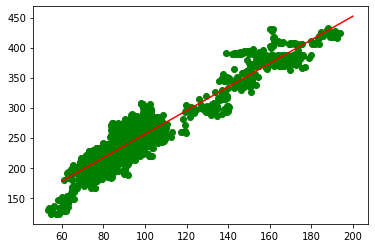

In [439]:
#линию регрессии добавляем на график
X0 = np.linspace(60,200,100)
Y0 = model.predict(X0)

plt.figure()
plt.scatter(X,Y, color='green')
plt.plot(X0, Y0, color='red')
plt.show()

In [440]:
model.error(X,Y)

176.3513647805667

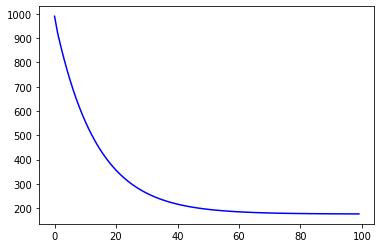

In [441]:
#график изменения подсчета ошибки
plt.figure()
plt.plot(steps,errors, color='BLUE')
plt.show()

### 2.Постройте модель регрессии на другой паре инструментов.


In [442]:

        
        
class Model:
    def __init__(self):
        self.b0 = 0
        self.b1 = 0
    def predict(self,x):
        
        #сделать нормализацию данных
        ''' x'=(x-xmin)/(xmax-xmin) '''
        x_norm = (x-x_min)/(x_max-x_min)
        
        return self.b0 + self.b1 * x_norm
    
    def error(self,x,y):
        return sum((self.predict(x) - y)** 2) / (2*len(x))
    
    def fit(self,x,y): #метод градиентного спуска
    
        
        #градиент функций
        alpha = 0.0011
        x_norm = (x-x_min)/(x_max-x_min)
        errors = []
        steps = list(range(100))
        for _ in steps:
            dj0 = sum(self.predict(x) - y )/ len(x_norm)
            dj1 = sum((self.predict(x) - y)* x_norm) /len(x_norm)
            #приближаемся к оптимуму 
            self.b0 = self.b0 - alpha*dj0
            self.b1 = self.b1 - alpha*dj1
            
            #график ошибок
            errors.append(self.error(x,y))
            steps
        return steps,errors
        

In [443]:

yndx = pd.read_csv('YNDX_101001_171001.txt')


In [444]:
yndx.head()

,<TICKER>,<PER>,<DATE>,<TIME>,<CLOSE>,<VOL>
0,YNDX,D,20140604,0,1170.0,35146
1,YNDX,D,20140605,0,1145.1,24973
2,YNDX,D,20140606,0,1163.0,7889
3,YNDX,D,20140609,0,1172.1,7304
4,YNDX,D,20140610,0,1170.0,3207


In [445]:
yndx.shape, sber.shape

((838, 6), (1758, 6))

In [446]:
# агрегируем данные
res2  = pd.merge(yndx, sber, on='<DATE>')

In [447]:
res2.head()

,<TICKER>_x,<PER>_x,<DATE>,<TIME>_x,<CLOSE>_x,<VOL>_x,<TICKER>_y,<PER>_y,<TIME>_y,<CLOSE>_y,<VOL>_y
0,YNDX,D,20140604,0,1170.0,35146,SBER,D,0,87.81,118784670
1,YNDX,D,20140605,0,1145.1,24973,SBER,D,0,87.43,136633680
2,YNDX,D,20140606,0,1163.0,7889,SBER,D,0,89.00,127884670
3,YNDX,D,20140609,0,1172.1,7304,SBER,D,0,88.89,84744280
4,YNDX,D,20140610,0,1170.0,3207,SBER,D,0,88.99,85841300


In [448]:
res2.shape

(838, 11)

In [449]:
X2 = res2['<CLOSE>_x'] #yndx
Y2 = res2['<CLOSE>_y'] #sber

#для нормализации узнаем мин и макс значения выборки Х
x_min = res['<CLOSE>_x'].min()
x_max = res['<CLOSE>_x'].max()


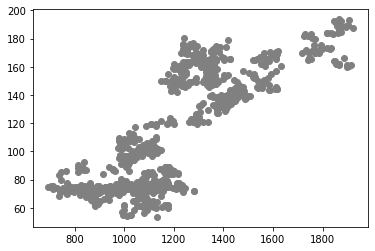

In [481]:
plt.figure()
plt.scatter(X2,Y2, color='grey')
plt.show()

In [477]:
model = Model()
steps,errors = model.fit(X2,Y2)

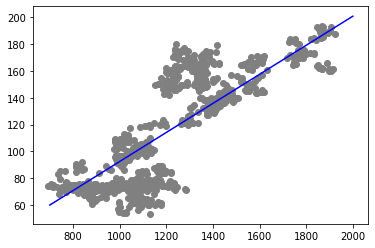

In [479]:
X0 = np.linspace(700,2000,1000)
Y0 = model.predict(X0)

plt.figure()
plt.scatter(X2,Y2, color='grey')
plt.plot(X0, Y0, color='blue')
plt.show()

In [480]:
model.error(X2,Y2)

283.35128863467116

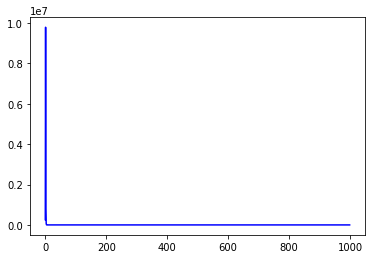

In [478]:
plt.figure()
plt.plot(steps,errors, color='BLUE')
plt.show()

### 4.По примеру программы регрессии, рассмотренной на семинаре, построить модель регрессии с использованием библиотечных средств


In [455]:
from sklearn.linear_model import LinearRegression

In [456]:
res.head()

,<TICKER>_x,<PER>_x,<DATE>,<TIME>_x,<CLOSE>_x,<VOL>_x,<TICKER>_y,<PER>_y,<TIME>_y,<CLOSE>_y,<VOL>_y
0,SBER,D,20101001,0,89.09,332429890,MVID,D,0,194.38,19406
1,SBER,D,20101004,0,89.88,194032721,MVID,D,0,190.00,31039
2,SBER,D,20101005,0,91.97,198775753,MVID,D,0,187.00,17651
3,SBER,D,20101006,0,91.20,210406027,MVID,D,0,190.04,36482
4,SBER,D,20101007,0,90.40,145137617,MVID,D,0,199.85,204248


In [457]:
X = res[['<CLOSE>_x']].values
Y = res[['<CLOSE>_y']].values


In [458]:
slr = LinearRegression()
slr.fit(X, Y)
y_pred = slr.predict(X)
print('Slope:',slr.coef_[0])
print('Intercept:',slr.intercept_)

Slope: [1.99635191]
Intercept: [56.01112869]


<function matplotlib.pyplot.show(*args, **kw)>

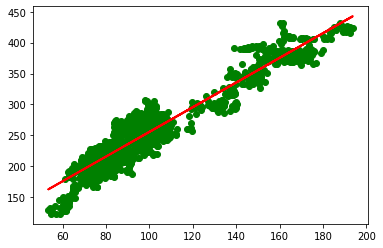

In [459]:
plt.scatter(X, Y, color='green')
plt.plot(X, slr.predict(X), color='red', linewidth=2)
plt.show

Визуально результат схож после использования самостоятельно написанного класса,но при детальном изучении видно, что результаты немного отличаются

Так как этот пакет используется специально для построения линейной регрессии, стоит предположить, что этот результат более точный

### 1.Реализуйте механизм адаптивной скорости обучения.


Cравнивать нынешнюю оценку с предыдущей, и если она больше чем прошлая, то изменять скорость обучения

In [460]:
class Model:
    def __init__(self):
        self.b0 = 0
        self.b1 = 0
    def predict(self,x):
        
        #сделать нормализацию данных
        ''' x'=(x-xmin)/(xmax-xmin) '''
        x_norm = (x-x_min)/(x_max-x_min)
        
        return self.b0 + self.b1 * x_norm
    
    def error(self,x,y):
        return sum((self.predict(x) - y)** 2) / (2*len(x))
    
    def fit(self,x,y): #метод градиентного спуска
    
        
        #градиент функций
        alpha = 0.1
        x_norm = (x-x_min)/(x_max-x_min)
        errors = []
        steps = list(range(1000))
        for i in steps:
            dj0 = sum(self.predict(x) - y )/ len(x_norm)
            dj1 = sum((self.predict(x) - y)* x_norm) /len(x_norm)
            #приближаемся к оптимуму 
            self.b0 = self.b0 - alpha*dj0
            self.b1 = self.b1 - alpha*dj1
            
            #график ошибок
            errors.append(self.error(x,y))
            steps
            #адаптивная скорость обучения
            if i != 0 and errors[-2] < (errors[-1] - 2):
                alpha = alpha * 0.1
        return steps,errors

In [461]:
model = Model()
steps,errors = model.fit(X,Y)

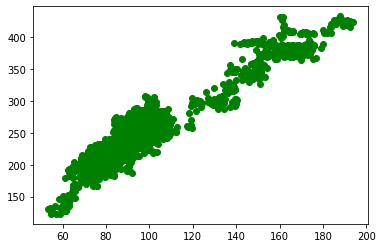

In [462]:
plt.figure()
plt.scatter(X,Y, color='green')
plt.show()

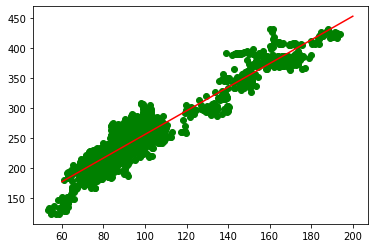

In [463]:
X0 = np.linspace(60,200,100)
Y0 = model.predict(X0)

plt.figure()
plt.scatter(X,Y, color='green')
plt.plot(X0, Y0, color='red')
plt.show()

In [465]:
model.error(X,Y)

array([176.1031552])

### 3. Модифицируйте класс регрессии так, чтобы он проводил обучение только на случайно выделенной части данных (обучающей выборке). Историю динамики ошибки отслеживать отдельно по обучающей и по тестовой выборке

In [483]:
def random_sample(x_sample,y_sample):
    #выбираем рандомно обучающую выборку (около 70%)
    f = random.randrange(0, len(X)-1)
    if f>=int(len(x_sample)//2):
        r = f - int(len(x_sample)//1.5)
        
        return x_sample[r:f], y_sample[r:f],x_sample[:r],y_sample[:r]
    else:
        r = f + int(len(x_sample)//1.5)
        return x_sample[f:r], y_sample[f:r],x_sample[r:],y_sample[r:]

class Regression:
    def __init__(self):
        self.b0 = 0
        self.b1 = 0
    def predict(self,x):
        
        #сделать нормализацию данных
        ''' x'=(x-xmin)/(xmax-xmin) '''
        x_norm = (x-x_min)/(x_max-x_min)
        
        return self.b0 + self.b1 * x_norm
    
    def error(self,x,y):
        return sum((self.predict(x) - y)** 2) / (2*len(x))
    
    def fit(self,x,y): #метод градиентного спуска
    
        
        #градиент функций
        alpha = 0.1
        x_norm = (x-x_min)/(x_max-x_min)
        errors = []
        steps = list(range(1000))
        for i in steps:
            dj0 = sum(self.predict(x) - y )/ len(x_norm)
            dj1 = sum((self.predict(x) - y)* x_norm) /len(x_norm)
            #приближаемся к оптимуму 
            self.b0 = self.b0 - alpha*dj0
            self.b1 = self.b1 - alpha*dj1
            
            #график ошибок
            errors.append(self.error(x,y))
            steps
            #адаптивная скорость обучения
            if i != 0 and errors[-2] < (errors[-1] - 2):
                alpha = alpha * 0.1
        return steps,errors

In [484]:
x_learn,y_learn,x_test,y_test = random_sample(X,Y)

In [485]:
x_learn

array([[ 92.85],
       [ 93.95],
       [ 93.86],
       ...,
       [165.8 ],
       [170.8 ],
       [169.97]])

In [486]:
y_learn

array([[278. ],
       [280.9],
       [289.5],
       ...,
       [383. ],
       [384.5],
       [384.6]])

In [487]:
x_test

array([[ 89.09],
       [ 89.88],
       [ 91.97],
       [ 91.2 ],
       [ 90.4 ],
       [ 90.5 ],
       [ 91.74],
       [ 90.9 ],
       [ 91.3 ],
       [ 91.47],
       [ 92.53],
       [ 94.96],
       [ 95.37],
       [ 97.7 ],
       [103.31],
       [101.9 ],
       [102.3 ],
       [101.42],
       [ 99.72],
       [ 99.35],
       [101.36],
       [101.85],
       [102.35],
       [103.3 ],
       [103.95],
       [103.59],
       [100.44],
       [ 98.4 ],
       [ 97.94],
       [ 97.8 ],
       [ 99.2 ],
       [ 95.26],
       [ 97.2 ],
       [ 99.66],
       [ 98.7 ],
       [ 99.15],
       [ 98.5 ],
       [101.31],
       [102.6 ],
       [101.36],
       [100.71],
       [101.51],
       [103.34],
       [103.64],
       [103.03],
       [105.56],
       [107.37],
       [104.67],
       [104.63],
       [104.92],
       [107.45],
       [107.25],
       [107.7 ],
       [106.3 ],
       [105.7 ],
       [105.6 ],
       [106.8 ],
       [106.78],
       [106.99

In [423]:
y_test

0      194.38
1      190.00
2      187.00
3      190.04
4      199.85
        ...  
342    225.50
343    229.00
344    226.50
345    228.00
346    232.37
Name: <CLOSE>_y, Length: 347, dtype: float64

In [488]:
model = Regression()
steps,errors = model.fit(x_learn,y_learn)
steps1,errors1 = model.fit(x_test,y_test)

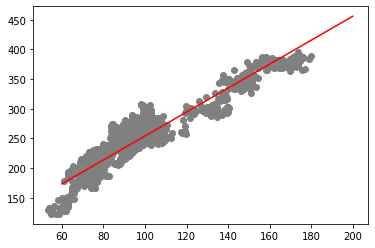

In [489]:
#Обучающая выборка
X0 = np.linspace(60,200,100)
Y0 = model.predict(X0)

plt.figure()
plt.scatter(x_learn,y_learn, color='grey')
plt.plot(X0, Y0, color='red')
plt.show()

In [490]:
model.error(x_learn,y_learn)

array([176.02428028])

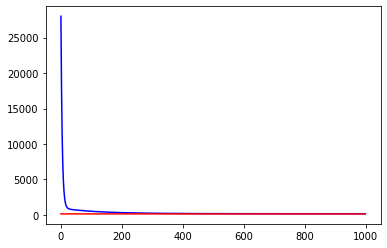

In [491]:
#График ошибки на обучающей
plt.figure()
plt.plot(steps,errors, color='BLUE')
#тестовая
plt.plot(steps1,errors1, color='RED')
plt.show()